##carregando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import scipy.stats as scs

In [ ]:
data = pd.read_csv('/content/cardio_train.csv',sep = ';')
data.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


##fazendo manipulações

In [ ]:
#alterando as idades de dias para anos aproximadamente, para melhorar a vizualização
idade = data['age']
anos = (idade/365).round()
anos = anos.astype('int64')
data['age'] = anos
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
5,8,60,1,151,67.0,120,80,2,2,0,0,0,0
6,9,61,1,157,93.0,130,80,3,1,0,0,1,0
7,12,62,2,178,95.0,130,90,3,3,0,0,1,1
8,13,48,1,158,71.0,110,70,1,1,0,0,1,0
9,14,54,1,164,68.0,110,60,1,1,0,0,0,0


In [ ]:
#mudando o tipo da respectivas variaveis para str
data[['gender','cholesterol',	'gluc',	'smoke',	'alco',	'active','cardio'	]] = data[['gender','cholesterol',	'gluc',	'smoke',	'alco',	'active','cardio'	]].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  object 
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  object 
 8   gluc         70000 non-null  object 
 9   smoke        70000 non-null  object 
 10  alco         70000 non-null  object 
 11  active       70000 non-null  object 
 12  cardio       70000 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 6.9+ MB


In [ ]:
#dicionario para alterar o genero no dataframe
dicionario_gender = {'1':'woman','2':'man'}

In [ ]:
#alterando o numero pelo seu respectivo valor usando o dicionario
data['gender'] = [dicionario_gender[resp] for resp in data['gender']]
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,man,168,62.0,110,80,1,1,0,0,1,0
1,1,55,woman,156,85.0,140,90,3,1,0,0,1,1
2,2,52,woman,165,64.0,130,70,3,1,0,0,0,1
3,3,48,man,169,82.0,150,100,1,1,0,0,1,1
4,4,48,woman,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
#calculando o IMC e adicionando ele a base
IMC = (data['weight']/(data['height']/100)**2)
IMC = pd.DataFrame(IMC)
data['IMC'] = IMC.round()
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
0,0,50,man,168,62.0,110,80,1,1,0,0,1,0,22.0
1,1,55,woman,156,85.0,140,90,3,1,0,0,1,1,35.0
2,2,52,woman,165,64.0,130,70,3,1,0,0,0,1,24.0
3,3,48,man,169,82.0,150,100,1,1,0,0,1,1,29.0
4,4,48,woman,156,56.0,100,60,1,1,0,0,0,0,23.0


In [ ]:
#excluindo a coluna de indentificação
data.drop(columns=['id'])

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
0,50,man,168,62.0,110,80,1,1,0,0,1,0,22.0
1,55,woman,156,85.0,140,90,3,1,0,0,1,1,35.0
2,52,woman,165,64.0,130,70,3,1,0,0,0,1,24.0
3,48,man,169,82.0,150,100,1,1,0,0,1,1,29.0
4,48,woman,156,56.0,100,60,1,1,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,man,168,76.0,120,80,1,1,1,0,1,0,27.0
69996,62,woman,158,126.0,140,90,2,2,0,0,1,1,50.0
69997,52,man,183,105.0,180,90,3,1,0,1,0,1,31.0
69998,61,woman,163,72.0,135,80,1,2,0,0,0,1,27.0


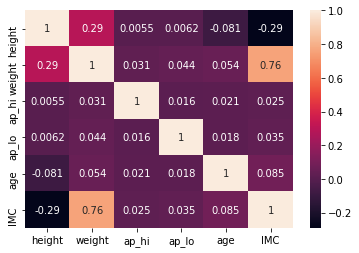

In [ ]:
#correlação das variáveis quantitativas
corrnum = data[['height','weight',	'ap_hi',	'ap_lo','age','IMC' ]].corr()
sns.heatmap(corrnum, annot=True)

##criando um novo data para manipular, data = idades

In [ ]:
#selecionando dados que irei trabalhar usando o filtro, assim fica melhor para trabalhar com poucas variaveis
idades_vizualisacao = ['age','cardio','gender']
idades = data.filter(items=idades_vizualisacao)
idades.shape


(70000, 3)

In [ ]:
#criando um dicionario para outras variaveis qualitativas que estão em numeros
dicionario_cardio = {'1':'positivo','0':'negativo'}
idades['cardio'] = [dicionario_cardio[resp] for resp in idades['cardio']]


In [ ]:
idades.head()

,age,cardio,gender
0,50,negativo,man
1,55,positivo,woman
2,52,positivo,woman
3,48,positivo,man
4,48,negativo,woman


Text(0, 0.5, 'Frequência Absoluta')

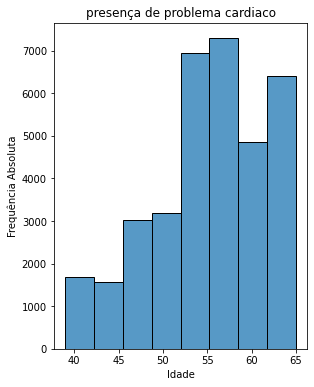

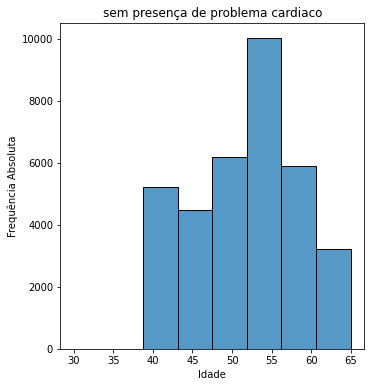

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(idades.query('cardio == "positivo"')['age'], palette='RdBu', bins = 8 )
plt.title('presença de problema cardiaco')
plt.xlabel('Idade')
plt.ylabel('Frequência Absoluta')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.histplot(idades.query('cardio == "negativo"')['age'], palette='RdBu', bins = 8 )
plt.title('sem presença de problema cardiaco')
plt.xlabel('Idade')
plt.ylabel('Frequência Absoluta')

Text(0, 0.5, 'Frequência Absoluta')

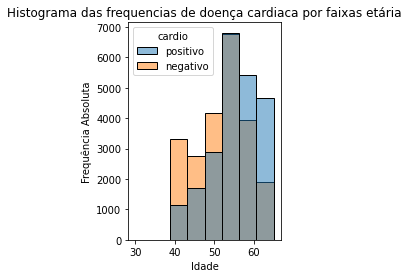

In [ ]:
#Histograma das frequencias de doença cardiaca por faixas etária - ta feio tem que melhorar
# plt.subplot(1,2,1)
# sns.histplot(x = 'age', hue = 'cardio',data = idades.query('gender == "woman"'), bins=8)
# plt.title('Histograma das frequencias de doença cardiaca por faixas etária')
# plt.xlabel('Idade')
# plt.ylabel('Frequência Absoluta')
#adicionar transparencia e mudar as cores


Text(0, 0.5, 'Frequência Absoluta')

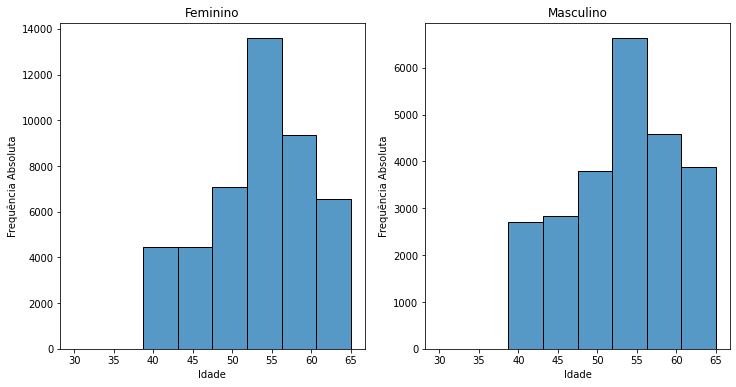

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data.query('gender == "woman"')['age'], palette='RdBu', bins = 8)
plt.title('Feminino')
plt.xlabel('Idade')
plt.ylabel('Frequência Absoluta')

plt.subplot(1, 2, 2)
sns.histplot(data.query('gender == "man"')['age'], palette='RdBu',bins = 8)
plt.title('Masculino')
plt.xlabel('Idade')
plt.ylabel('Frequência Absoluta')

Text(0.5, 1.0, 'Masculino')

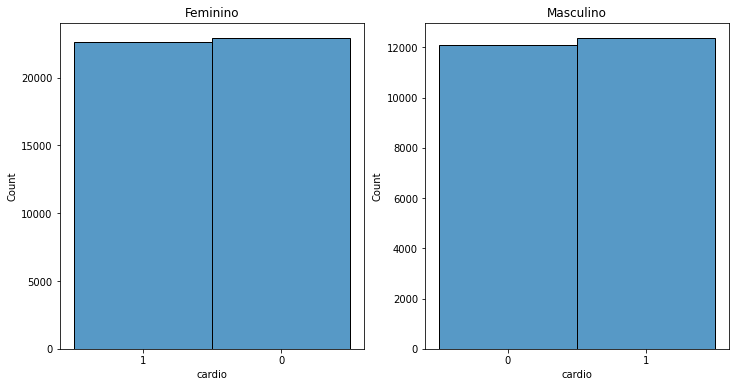

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data.query('gender == "woman"')['cardio'], palette='RdBu')
plt.title('Feminino')

plt.subplot(1, 2, 2)
sns.histplot(data.query('gender == "man"')['cardio'], palette='RdBu')
plt.title('Masculino')

Text(0, 0.5, 'idade')

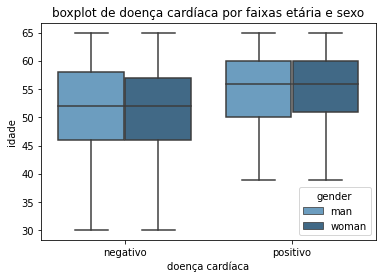

In [ ]:
#boxplot de doença cardíaca por faixas etária e sexo - pode melhorar tambemm
sns.boxplot(x='cardio', y = 'age', hue='gender', data=idades,palette='Blues_d')
plt.title('boxplot de doença cardíaca por faixas etária e sexo')
plt.xlabel('doença cardíaca')
plt.ylabel('idade')

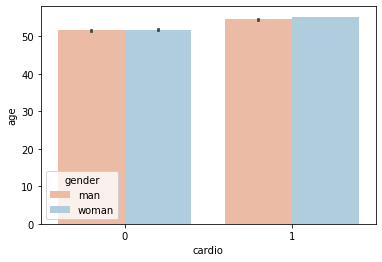

In [ ]:
# Gráfico de barras de problemas cardiacos por idade e sexo
sns.barplot(x='cardio', y='age', data=data,
            hue='gender',palette='RdBu')

In [ ]:

data['age'].describe()

count    70000.000000
mean        53.338686
std          6.765294
min         30.000000
25%         48.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: age, dtype: float64

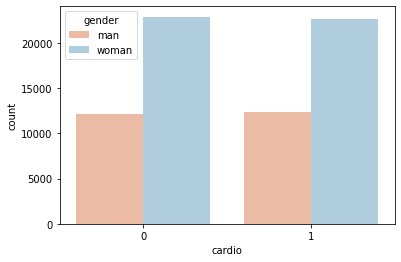

In [ ]:
#procurando saber qual sexo tem mais pessoas com doença cardiaca
ax = sns.countplot(x = 'cardio', hue = 'gender',data = data, palette='RdBu')

##aplicando o Teste qui quadrado de pearson as variaveis qualitativas

In [ ]:
#aplicando o Teste qui quadrado de pearson as variaveis qualitativas
#primeiramente vamos seleciona-las para facilitar o trabalho
colunas_selecionadas = ['gender','cardio','gluc','cholesterol','active','smoke','alco']
new_data = data.filter(items=colunas_selecionadas)
new_data.head()

,gender,cardio,gluc,cholesterol,active,smoke,alco
0,man,0,1,1,1,0,0
1,woman,1,1,3,1,0,0
2,woman,1,1,3,0,0,0
3,man,1,1,1,1,0,0
4,woman,0,1,1,0,0,0


In [ ]:
#aplicando os dicionarios no novo data frame
dicionario_cardio = {'1':'positivo','0':'negativo'}
cholesterol_gluc = {'1':'Normal','2':'above_normal','3':'well_above_normal'}

In [ ]:
#aplicando os dicionarios no novo data frame
new_data['cardio'] = [dicionario_cardio[resp] for resp in new_data['cardio']]


In [ ]:
#aplicando os dicionarios no novo data frame
new_data['active'] = [dicionario_cardio[resp] for resp in new_data['active']]
new_data['smoke'] = [dicionario_cardio[resp] for resp in new_data['smoke']]
new_data['alco'] = [dicionario_cardio[resp] for resp in new_data['alco']]


In [ ]:
#aplicando os dicionarios no novo data frame
new_data['gluc'] = [cholesterol_gluc[resp] for resp in new_data['gluc']]
new_data['cholesterol'] = [cholesterol_gluc[resp] for resp in new_data['cholesterol']]

In [ ]:
new_data.head()

,gender,cardio,gluc,cholesterol,active,smoke,alco
0,man,negativo,Normal,Normal,positivo,negativo,negativo
1,woman,positivo,Normal,well_above_normal,positivo,negativo,negativo
2,woman,positivo,Normal,well_above_normal,negativo,negativo,negativo
3,man,positivo,Normal,Normal,positivo,negativo,negativo
4,woman,negativo,Normal,Normal,negativo,negativo,negativo


In [ ]:
#isolando as colunas ara aplicar o metodo de qui-quadrado de pearson nos dados qualitativos
cardio = new_data['cardio']
gender = new_data['gender']
gluc = new_data['gluc']
cholesterol = new_data['cholesterol']
active = new_data['active']
smoke = new_data['smoke']
alco = new_data['alco']

In [ ]:
tab1 = pd.crosstab(cardio,smoke)
from scipy.stats import  chi2_contingency
chi2, p, dof, exp = chi2_contingency(tab1.values)
print('Qui-quadrado: {:0.3} p-valor: {:0.3} '.format(chi2,p))

Qui-quadrado: 16.7 p-valor: 4.43e-05 


In [ ]:
tab2 = pd.crosstab(cardio,active)
from scipy.stats import  chi2_contingency
chi2, p, dof, exp = chi2_contingency(tab2.values)
print('Qui-quadrado: {:0.3} p-valor: {:0.3} '.format(chi2,p))

Qui-quadrado: 88.8 p-valor: 4.37e-21 


In [ ]:
tab3 = pd.crosstab(cardio,gender)
from scipy.stats import  chi2_contingency
chi2, p, dof, exp = chi2_contingency(tab3.values)
print('Qui-quadrado: {:0.3} p-valor: {:0.3} '.format(chi2,p))

Qui-quadrado: 4.57 p-valor: 0.0325 


In [ ]:
tab4 = pd.crosstab(cardio,cholesterol)
from scipy.stats import  chi2_contingency
chi2, p, dof, exp = chi2_contingency(tab4.values)
print('Qui-quadrado: {:0.3} p-valor: {:0.3} '.format(chi2,p))

Qui-quadrado: 3.42e+03 p-valor: 0.0 


In [ ]:
tab5 = pd.crosstab(cardio,gluc)
from scipy.stats import  chi2_contingency
chi2, p, dof, exp = chi2_contingency(tab5.values)
print('Qui-quadrado: {:0.3} p-valor: {:0.3} '.format(chi2,p))

Qui-quadrado: 5.87e+02 p-valor: 3.58e-128 


In [ ]:
tab6 = pd.crosstab(cardio,alco)
from scipy.stats import  chi2_contingency
chi2, p, dof, exp = chi2_contingency(tab6.values)
print('Qui-quadrado: {:0.3} p-valor: {:0.3} '.format(chi2,p))

Qui-quadrado: 3.7 p-valor: 0.0545 


todos os p valores são menores que o qui quadrado o que indica que podemos rejeitar a hipotese nula e assim concluir que as variaveis estão relacionadas(porém tenho que estudar isso melhor)

In [ ]:
#fazedo o teste de shapiro wilk para verificar se os dados estão normalizados
dados_numericos = ['height',	'weight'	,'IMC','age',	'ap_hi',	'ap_lo']
shapiro_test = data.filter(items=dados_numericos)
shapiro_test.head()

,height,weight,IMC,age,ap_hi,ap_lo
0,168,62.0,22.0,50,110,80
1,156,85.0,35.0,55,140,90
2,165,64.0,24.0,52,130,70
3,169,82.0,29.0,48,150,100
4,156,56.0,23.0,48,100,60


In [ ]:
#o valor p pode não ser preciso para N> 5000.
shapiro_stat,shapiro_p_valor = scs.shapiro(shapiro_test)
print('O valor da estatística de Shapiro-Wilk = ' + str(shapiro_stat))
print('O valor de p de Shapiro-Wilk = ' + str(shapiro_p_valor))

O valor da estatística de Shapiro-Wilk = 0.24665260314941406
O valor de p de Shapiro-Wilk = 0.0


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  object 
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  object 
 8   gluc         70000 non-null  object 
 9   smoke        70000 non-null  object 
 10  alco         70000 non-null  object 
 11  active       70000 non-null  object 
 12  cardio       70000 non-null  object 
 13  IMC          70000 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 7.5+ MB


##grafico atividade e cardio

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'active' ,hue = 'cardio',data = new_data, palette='RdBu')
plt.title('Gráfico da relação entre atividade física e problema cardíaco \n')
plt.xlabel('atividade física')
plt.ylabel('Frequência Absoluta')


##grafico colesterol e cardio

Text(0, 0.5, 'Frequência Absoluta')

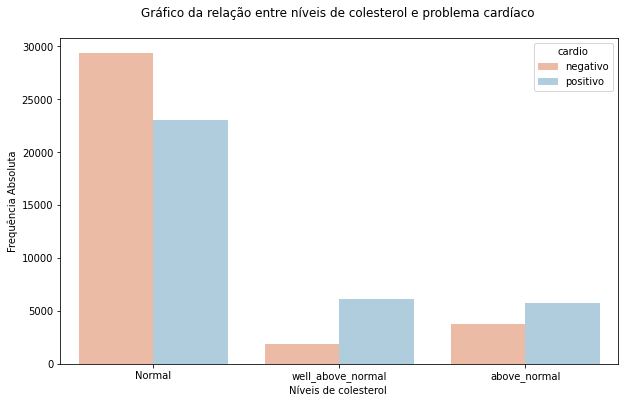

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'cholesterol' ,hue = 'cardio',data = new_data, palette='RdBu')
plt.title('Gráfico da relação entre níveis de colesterol e problema cardíaco \n')
plt.xlabel('Níveis de colesterol ')
plt.ylabel('Frequência Absoluta')


<Figure size 720x432 with 0 Axes>

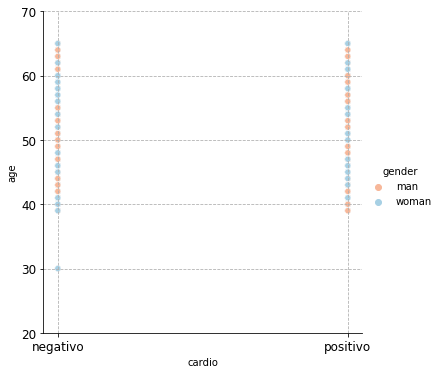

In [ ]:
plt.figure(figsize=(10, 6))
sns.relplot(x= 'cardio',y = 'age',data=idades,hue='gender',palette='RdBu')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(20, 70)
plt.grid(linestyle='--')
sns.despine()